<a href="https://colab.research.google.com/github/ongfong/data_analysis_projects/blob/main/AAPL_stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# **S&P 500 stock dataset**
Historical stock data for all current S&P 500 companies

[**Source:**](https://www.kaggle.com/datasets/camnugent/sandp500)

### **Data Cleaning**

In [4]:
df = pd.read_csv('/content/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [7]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

**Replace the column name from name to ticks.**

In [8]:
df = df.rename(columns={'Name': 'Ticks'})

**Change date type from object type to date type.**

In [9]:
df['date'] = pd.to_datetime(df['date'],format='%Y/%m/%d')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Ticks   619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


**Check null values**

In [12]:
null = df.isnull().sum()
print(null)

date       0
open      11
high       8
low        8
close      0
volume     0
Ticks      0
dtype: int64


In [15]:
#drop the null values
df.dropna(inplace=True)

In [14]:
null = df.isnull().sum()
print(null)

date      0
open      0
high      0
low       0
close     0
volume    0
Ticks     0
dtype: int64


### **Data Analysis**

In [17]:
aapl = df.loc[df['Ticks'] == 'AAPL']
aapl.head()

,date,open,high,low,close,volume,Ticks
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


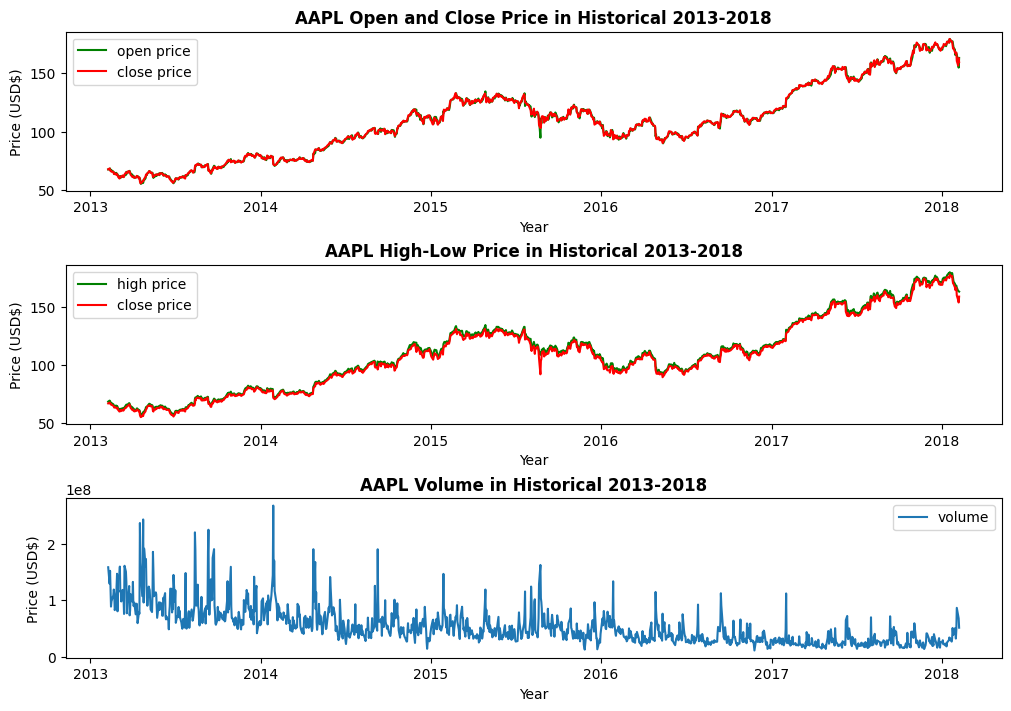

In [32]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,7), constrained_layout=True)
ax1.plot(aapl['date'],aapl['open'],label='open price', color='green')
ax1.plot(aapl['date'],aapl['close'],label='close price', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price (USD$)')
ax1.legend()
ax1.set_title('AAPL Open and Close Price in Historical 2013-2018', weight='bold')

ax2.plot(aapl['date'],aapl['high'], label='high price', color='green')
ax2.plot(aapl['date'],aapl['low'], label='close price', color='red')
ax2.set_xlabel('Year')
ax2.set_ylabel('Price (USD$)')
ax2.legend()
ax2.set_title("AAPL High-Low Price in Historical 2013-2018", weight='bold')

ax3.plot(aapl['date'],aapl['volume'],label='volume')
ax3.set_xlabel('Year')
ax3.set_ylabel('Price (USD$)')
ax3.legend()
ax3.set_title('AAPL Volume in Historical 2013-2018', weight='bold')

plt.show()

In [24]:
fig = go.Figure(data=go.Ohlc(x=aapl['date'],open=aapl['open'],high=aapl['high'],low=aapl['low']
                             ,close=aapl['close'],increasing=dict(line=dict(color= '#58FA58'))
                             ,decreasing=dict(line=dict(color= '#FA5858'))))
fig.update_layout(
title = 'Apple Historical Price (USD$)',
yaxis_title = 'AAPL stock')

fig.show()